<IPython.core.display.Javascript object>


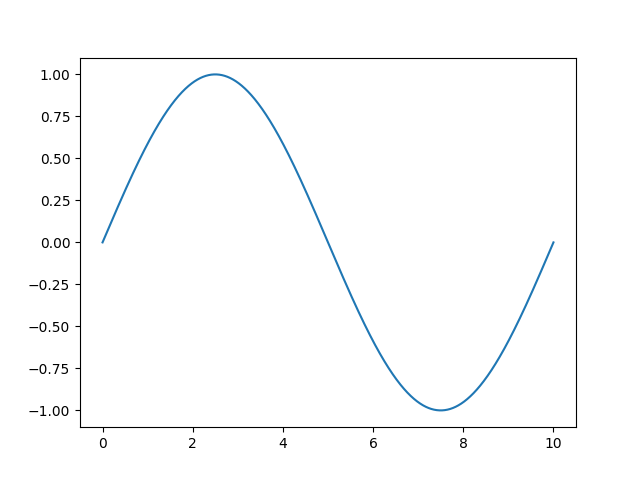

Operator `Kernel` run in 5.54 s


<IPython.core.display.Javascript object>


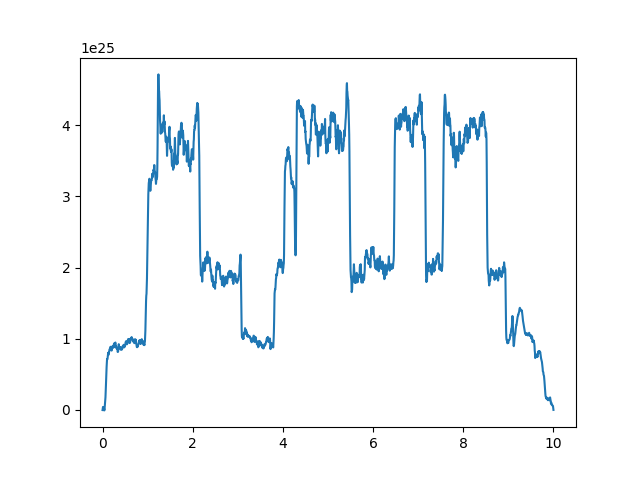

(3, 2001)
4.7125592713828575e+25


In [24]:
%matplotlib notebook
from devito import SpaceDimension, Constant, Grid, TimeFunction, Eq, Operator
from sympy import solve
from numpy import sin, pi, linspace, shape
import matplotlib.pyplot as plt

L = 10. # Define length of domain as a global variable
k = 100 # Number of terms in the Fourier sine series
l = 2001 # Define number of points in domain
x_vals = linspace(0, L, l) # x axis for calling u(x, t) at given t

# Set up conventional FD parameters
so_dev = 4 # 4th order accurate in space
to_dev = 2 # 2nd order accurate in time

extent = (L,) # Grid is L long with l grid points
shape = (l,)

# dt is defined using Courant condition (c = 1)
#dt = 0.5*(L/(l-1))
dt = 1e-5
t_end = L*4 # Standing wave will cycle twice(?) in time L
ns = int(t_end/dt) # Number of timesteps = total time/timestep size

# Define x as spatial dimention for Sympy
x = SpaceDimension(name='x', spacing=Constant(name='h_x', value=extent[0]/(shape[0]-1)))
grid = Grid(extent=extent, shape=shape, dimensions=(x,))
time = grid.time_dim

# Set up function and stencil
u_dev = TimeFunction(name="u_dev", grid=grid, space_order=so_dev, time_order=to_dev)
stencil_dev = Eq(u_dev.forward, solve(u_dev.dx2 - u_dev.dt2, u_dev.forward)[0])

bc = [Eq(u_dev[time+1,0], 0.0)] # Specify boundary conditions
bc += [Eq(u_dev[time+1,-1], 0.0)]

u_dev.data[:] = sin(2*pi*x_vals/L)

fig = plt.figure()
plt.plot(x_vals, u_dev.data[1])
plt.show()

# Create operator
op_dev = Operator([stencil_dev])
# Apply operator
op_dev.apply(time_M=ns-1, dt=dt)

fig = plt.figure()
plt.plot(x_vals, u_dev.data[-1])
plt.show()

print(u_dev.data.shape)
print(max(abs(u_dev.data[1] - sin(2*pi*x_vals/L))))